In [1]:
import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def linear(n, l, p:ca.SX, ls):
    y = 0
    for i in range(n-1):
        y += ca.logic_and(ls[i]<=l, l<ls[i+1])*( p[:,i]+(l-ls[i])/(ls[i+1]-ls[i])*(p[:,i+1]-p[:,i]) )
    y += (ls[n-1]<=l)*p[:,n-1]
    # y += (ls[n-1]<=l)*( p[:,n-2]+(l-ls[n-2])/(ls[n-1]-ls[n-2])*(p[:,n-1]-p[:,n-2]) )
    return y

In [3]:
p = ca.SX([[1,3,4,6]])
ls = [0,2,3,5]
l = ca.SX.sym('l',1)

In [4]:
a = ca.SX.sym('a', 3)
b = ca.SX.sym('b', 3)
ca.norm_1(a-b)

SX(((fabs((a_0-b_0))+fabs((a_1-b_1)))+fabs((a_2-b_2))))

In [5]:
# trajector
trjp = np.zeros((3,20))
for i in range(20):
    trjp[0,i] = np.sin(i/15)*8
    trjp[1,i] = np.cos(i/3)*9-9
    trjp[2,i] = 0
ls = [0]
for i in range(19):
    ls.append(ls[i]+np.linalg.norm(trjp[:,i+1]-trjp[:,i]))

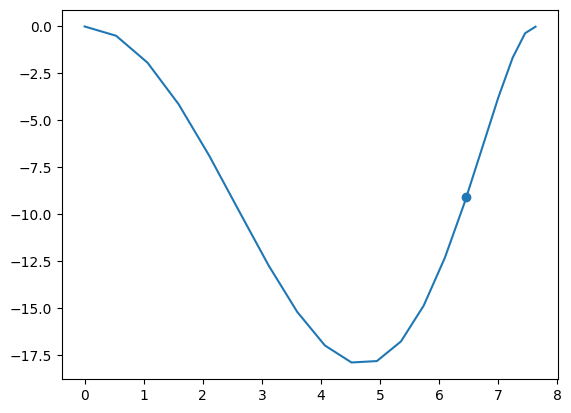

In [6]:
plt.plot(trjp[0,:], trjp[1,:])
sa = linear(20,28,trjp,ls)
plt.scatter(sa[0], sa[1])

In [7]:
import csv
import numpy as np

In [8]:
with open("./rpg_results/result.csv") as f:
    # traj_reader = csv.reader(f, delimiter=',',quotechar='"', quoting=csv.QUOTE_NONNUMERIC)
    traj_reader = csv.DictReader(f)
    print(next(traj_reader))
    print(float(next(traj_reader)['p_x']))

{'t': '0', 'p_x': '-4.190308118573105', 'p_y': '-5.795051586447227', 'p_z': '3.4208532743093487', 'q_w': '0.6835871803594799', 'q_x': '0.431898695241304', 'q_y': '-0.20757764804356915', 'q_z': '-0.5505302933806053', 'v_x': '-0.263790315799425', 'v_y': '4.276615305544708', 'v_z': '0.1778808846416545', 'w_x': '0.056991051000408154', 'w_y': '0.03437497316748204', 'w_z': '0.3348816765043365', 'a_lin_x': '12.734134248174167', 'a_lin_y': '3.4595255976159556', 'a_lin_z': '0.6720094604294566', 'a_rot_x': '-0.01478134627641906', 'a_rot_y': '0.02051123059779669', 'a_rot_z': '-6.184151110808269e-05', 'u_1': '4.178948811461556', 'u_2': '4.178999667790071', 'u_3': '4.178999447927334', 'u_4': '4.178856036570749', 'mu_0': '1.0', 'nu_0': '0', 'tau_0': '0', 'mu_1': '1.0', 'nu_1': '0', 'tau_1': '0', 'mu_2': '1.0', 'nu_2': '0', 'tau_2': '0', 'mu_3': '1.0', 'nu_3': '0', 'tau_3': '0'}
-4.192195843797128


In [9]:
import time
traj = np.random.random((500, 3))
pos = np.array([0.2, 0.3, 0.2])

t1 = time.time()
idx = 0
lmin = 1000000
for i in range(500):
    l = np.linalg.norm(pos-traj[i])
    if l < lmin:
        lmin = l
        idx=i

t2 = time.time()
print(t2-t1)

idx

0.004021883010864258


301

In [147]:
np.random.random(3)*np.array([2,2,1])-np.array([1, 1, 0.5])

array([ 0.45399817, -0.07398073,  0.42894072])